# **SEMMA for Rice Classification**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Sampling**

In [ ]:
import pandas as pd

# Load the dataset
rice_data = pd.read_csv('/content/drive/MyDrive/Data_Mining_CMPE_255/riceClassification.csv')

# Display the first few rows of the dataset to understand its structure
rice_data.head()

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1


Based on the sample dataset:

- The dataset contains various attributes related to rice grain measurements such as Area, MajorAxisLength, MinorAxisLength, Eccentricity, and so on.

- The target variable is Class, which we aim to determine.

## **Explore**

In [ ]:
# Summary statistics for the dataset
summary_stats = rice_data.describe()

# Distribution of the target variable 'Class'
class_distribution = rice_data['Class'].value_counts(normalize=True) * 100

summary_stats, class_distribution

(                 id          Area  MajorAxisLength  MinorAxisLength  \
 count  18185.000000  18185.000000     18185.000000     18185.000000   
 mean    9093.000000   7036.492989       151.680754        59.807851   
 std     5249.701658   1467.197150        12.376402        10.061653   
 min        1.000000   2522.000000        74.133114        34.409894   
 25%     4547.000000   5962.000000       145.675910        51.393151   
 50%     9093.000000   6660.000000       153.883750        55.724288   
 75%    13639.000000   8423.000000       160.056214        70.156593   
 max    18185.000000  10210.000000       183.211434        82.550762   
 
        Eccentricity    ConvexArea  EquivDiameter        Extent     Perimeter  \
 count  18185.000000  18185.000000   18185.000000  18185.000000  18185.000000   
 mean       0.915406   7225.817872      94.132952      0.616653    351.606949   
 std        0.030575   1502.006571       9.906250      0.104389     29.500620   
 min        0.676647   257

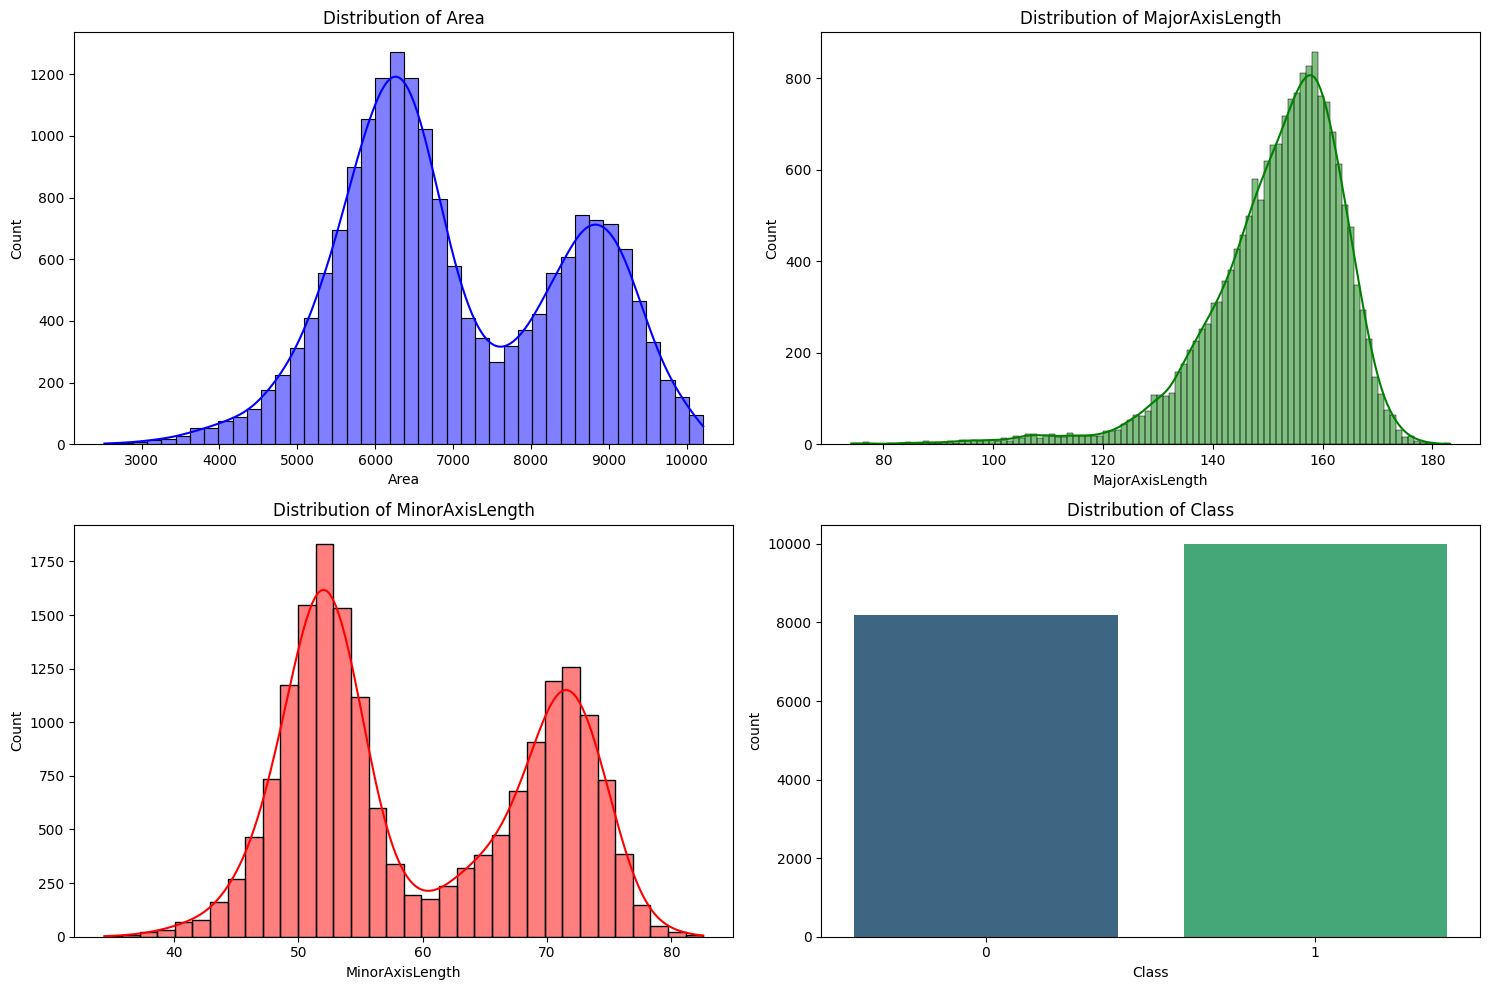

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure and axes
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Plotting distribution of Area
sns.histplot(rice_data['Area'], ax=axs[0, 0], kde=True, color='blue')
axs[0, 0].set_title('Distribution of Area')

# Plotting distribution of MajorAxisLength
sns.histplot(rice_data['MajorAxisLength'], ax=axs[0, 1], kde=True, color='green')
axs[0, 1].set_title('Distribution of MajorAxisLength')

# Plotting distribution of MinorAxisLength
sns.histplot(rice_data['MinorAxisLength'], ax=axs[1, 0], kde=True, color='red')
axs[1, 0].set_title('Distribution of MinorAxisLength')

# Plotting distribution of Class
sns.countplot(x='Class', data=rice_data, ax=axs[1, 1], palette='viridis')
axs[1, 1].set_title('Distribution of Class')

plt.tight_layout()
plt.show()

## **Modify**

Check for missing values in the dataset

In [ ]:
missing_values = rice_data.isnull().sum()

missing_values

id                 0
Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Perimeter          0
Roundness          0
AspectRation       0
Class              0
dtype: int64

The dataset does not have any missing values, which is excellent.

There are no categorical variables to be encoded. Performing scaling on the numerical features to prepare the dataset for model that requires scaled data.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Excluding 'id' and 'Class' columns for scaling
features = rice_data.drop(columns=['id', 'Class'])

# Scaling the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Convert scaled features back to dataframe
scaled_df = pd.DataFrame(scaled_features, columns=features.columns)

scaled_df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation
0,-1.703630,-4.803744,0.417927,-6.393938,-1.696989,-1.830049,0.391654,-2.661778,0.839588,-2.663800
1,-2.838478,-6.220789,-0.835611,-6.209583,-2.803539,-3.398143,0.923070,-4.857318,1.837215,-2.635418
2,-2.718519,-6.091404,-0.771700,-6.024520,-2.725641,-3.213879,1.365122,-4.799860,2.383587,-2.605950
3,-2.701479,-6.031573,-0.783130,-5.781578,-2.708996,-3.188141,1.598635,-4.777995,2.409877,-2.565690
4,-2.278893,-5.377799,-0.341288,-5.433479,-2.279559,-2.580390,1.463045,-4.111042,2.477331,-2.504645


## **Model**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(scaled_features, rice_data['Class'], test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Classification report
class_report = classification_report(y_test, y_pred)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

print('Accuracy: ', accuracy)
print('Class Report:\n', class_report)

Accuracy:  0.9898267803134452
Class Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1632
           1       0.99      0.99      0.99      2005

    accuracy                           0.99      3637
   macro avg       0.99      0.99      0.99      3637
weighted avg       0.99      0.99      0.99      3637



Accuracy:
- The Random Forest classifier achieved an accuracy of approximately 98.98% on the test set.

Classification Report:

- Precision: The classifier has a precision of 99% for both classes, indicating that the predictions are highly accurate.
- Recall: The recall for both classes is also around 99%, indicating that the classifier is capturing most of the positive samples.
- F1-Score: The F1-score, which is the harmonic mean of precision and recall, is 99% for both classes, suggesting a balanced model.

## **Assess**

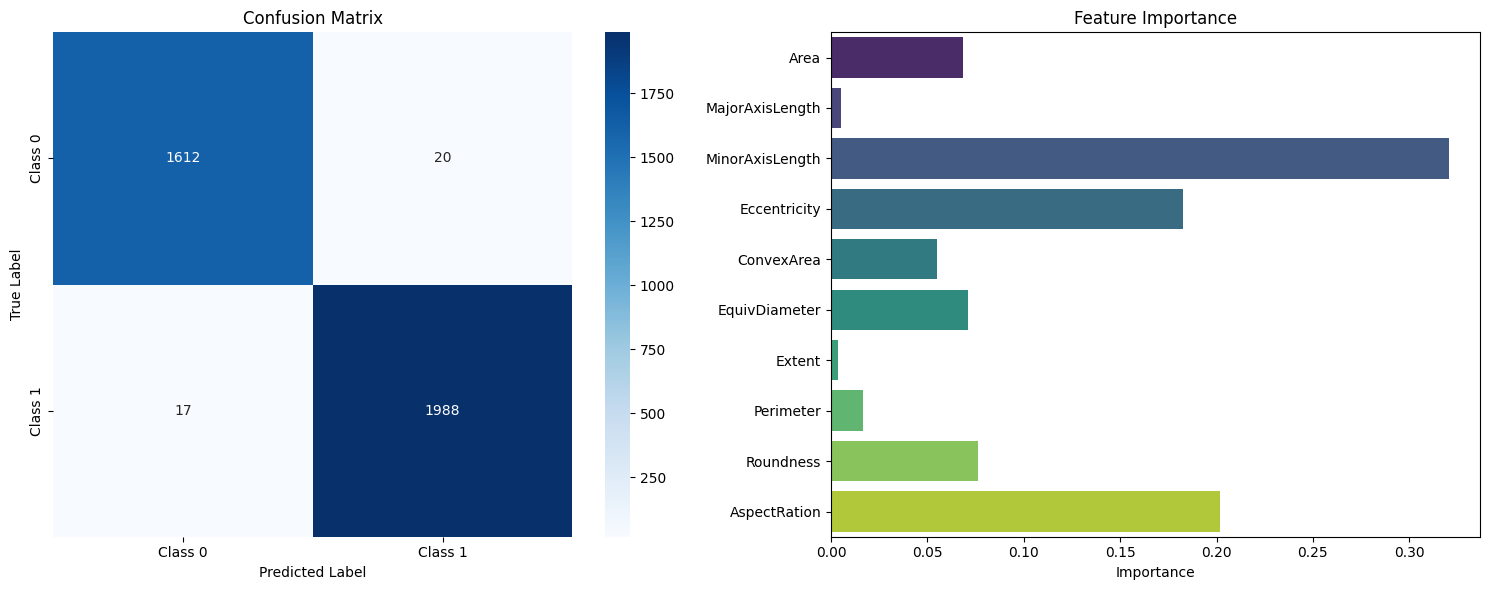

In [ ]:
# Set up the figure and axes
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Plotting the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", ax=axs[0])
axs[0].set_title('Confusion Matrix')
axs[0].set_xlabel('Predicted Label')
axs[0].set_ylabel('True Label')
axs[0].xaxis.set_ticklabels(['Class 0', 'Class 1'])
axs[0].yaxis.set_ticklabels(['Class 0', 'Class 1'])

# Plotting feature importance
feature_importances = rf_classifier.feature_importances_
sns.barplot(x=feature_importances, y=features.columns, ax=axs[1], palette="viridis")
axs[1].set_title('Feature Importance')
axs[1].set_xlabel('Importance')

plt.tight_layout()
plt.show()

The confusion matrix shows that the random forest classifier model is working pretty well with dataset, given the accuracy, precision, recall and f1 score.

Furthermore, feature importance shows that MinorAxisLength, Eccentricity and AspectRation are the most influential features for the random forest classifier model in determining the class.

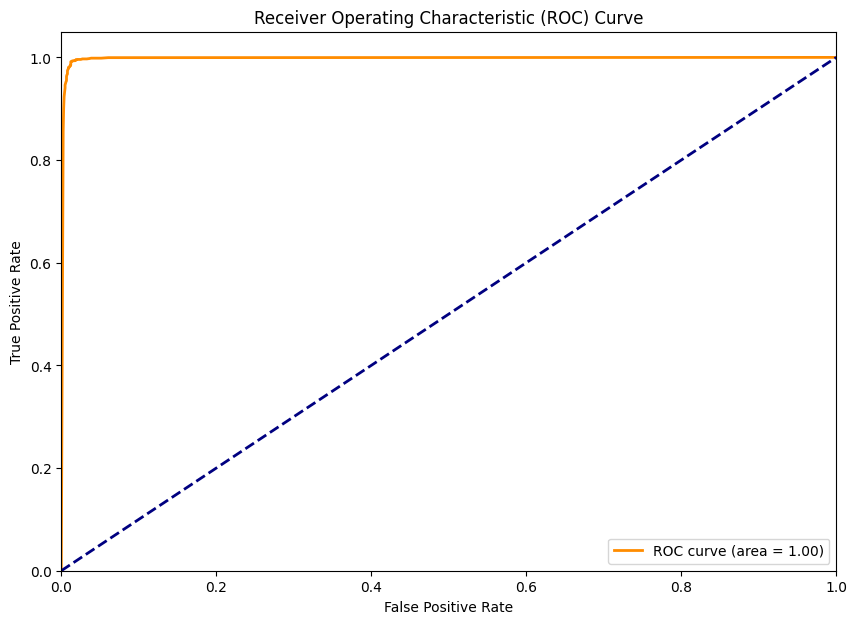

0.9977944232555865

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

# Compute the probabilities of the test set
y_prob = rf_classifier.predict_proba(X_test)[:, 1]

# Compute the ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Compute AUC
roc_auc = auc(fpr, tpr)

# Plotting ROC curve
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

roc_auc

The curve closely follows the top-left corner, indicating that the classifier performs well across various thresholds.

The Area Under the Curve (AUC) is approximately : 0.9978

0.9978, which is very close to 1. This suggests that the classifier does an excellent job distinguishing between the two classes.